# Analysis WRF-Chem outputs 24h test run over India (chem_opt=201)

In [1]:
#from netCDF4 import Dataset as NetCDFFile 
import numpy as np
import xarray as xr

import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

from cartopy import config
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

import warnings
warnings.filterwarnings('ignore')

In [2]:
#import data and store them with xarray
wrf_pth ='/exports/csce/datastore/geos/users/s1878599/WRFchem4.0/model/WRF/test/em_real/outputs/test_india_24h/test3_201/wrfout_d01_2010-04-01_18:00:00'
da = xr.open_dataset(wrf_pth,decode_times=True)

In [3]:
#define the plot function.

def var_plot_2D(var_name):

    #draw map
    ax = plt.subplot(projection=ccrs.PlateCarree())
    
    # draw coastlines and borders
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS, lw=0.5)
 
    #draw meridians and parallels
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=0.5, color='k', alpha=0.4, linestyle='-')
    gl.xlabels_top = False
    gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 10, 'color': 'gray'}
    gl.ylabel_style = {'size': 10, 'color': 'grey'}
    
    #plot SURFACE data
    long = var_name.XLONG.values[0,:,:]
    lat  = var_name.XLAT.values[0,:,:]
    var_values= var_name[0,0,:,:]
    res = 15 #controls the resolution for the map plotting.
    
    cs=plt.contourf( long, lat, var_values,res,
             transform=ccrs.PlateCarree(), cmap=plt.cm.YlGnBu)

    #colorbar
    cbar = plt.colorbar(cs) # pad=0.2 #format='%.2e'
    cbar.set_label(var_name.units)
    ax.set_title(var_name.name + '  ' + str(var_name.XTIME.values))
    
    #plotting parameters
    plt.rcParams['figure.figsize'] = [10, 5]

## PM2.5

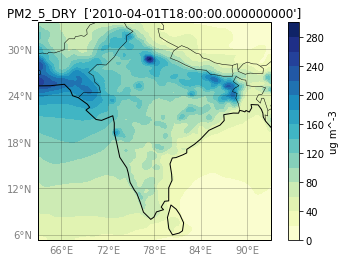

In [4]:
var_plot_2D(da.PM2_5_DRY)

## Ozone

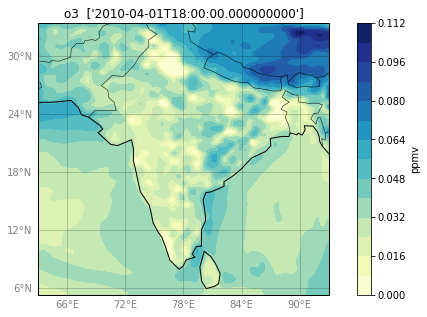

In [5]:
var_plot_2D(da.o3)

##  Nitrogen Dioxide

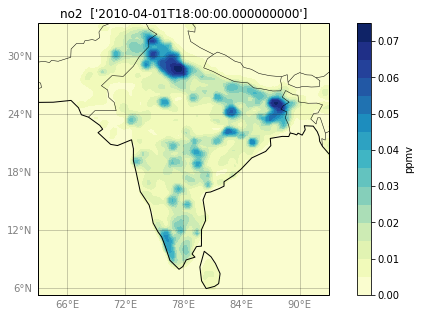

In [6]:
var_plot_2D(da.no2)

## Carbon monoxide

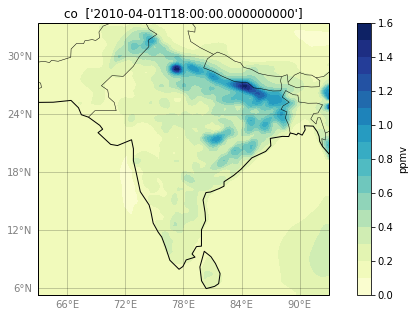

In [7]:
var_plot_2D(da.co)

#  Delhi analysis PM2.5

In [8]:
#select ranfe LAT and LONG for Delhi
delhi = da.where((da.XLAT>27.5) & (da.XLAT<29.5) & (da.XLONG>76.5) & (da.XLONG<78.5))

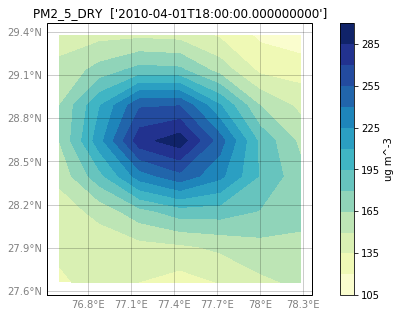

In [9]:
var_plot_2D(delhi.PM2_5_DRY)